In [70]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,6)

import seaborn as sns
sns.set()

In [71]:
file_path = r"C:\Users\12489\Documents\Data\driver_data.csv"
df = pd.read_csv(file_path)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Driver_ID         4000 non-null   int64  
 1   Distance_Feature  4000 non-null   float64
 2   Speeding_Feature  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [73]:
df_slim = df.drop('Driver_ID', axis=1)

""" we will drop the ID, since we don't need it
...and then check to make sure it worked

(we already know that there are no null values)"""

df_slim.head(3)

,Distance_Feature,Speeding_Feature
0,71.24,28
1,52.53,25
2,64.54,27


-------------------------

In [74]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
# ^^make sure you specify number of clusters^^

In [75]:
kmeans.fit(df_slim)
kmeans.cluster_centers_

array([[ 50.04763437,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [76]:
print(kmeans.labels_)
print(len(kmeans.labels_))
print(type(kmeans.labels_))

[0 0 0 ... 1 1 1]
4000
<class 'numpy.ndarray'>


In [77]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)

print(dict(zip(unique, counts)))

{0: 3200, 1: 800}


-----------------------------

C:\Users\12489\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\12489\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


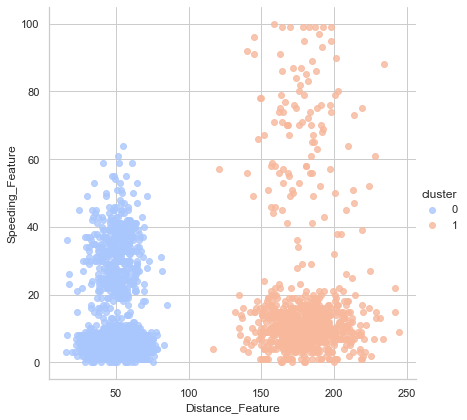

In [78]:
df_slim['cluster'] = kmeans.labels_

sns.set_style('whitegrid')

sns.lmplot('Distance_Feature', 'Speeding_Feature', 
data=df_slim, hue='cluster', palette='coolwarm',
size=6, aspect=1, fit_reg=False)

-------------------------------------------

### now, let's see what happens with four clusters...

In [79]:
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(df.drop('Driver_ID', axis=1))

print(kmeans4.cluster_centers_)

[[ 49.99263253   5.20447169]
 [180.34311782  10.52011494]
 [177.83509615  70.28846154]
 [ 50.40482436  32.36533958]]


In [80]:
unique4, counts4 = np.unique(kmeans4.labels_, return_counts=True)

kmeans4.cluster_centers_
print(dict(zip(unique4, counts4)))

{0: 2773, 1: 696, 2: 104, 3: 427}


C:\Users\12489\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\12489\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


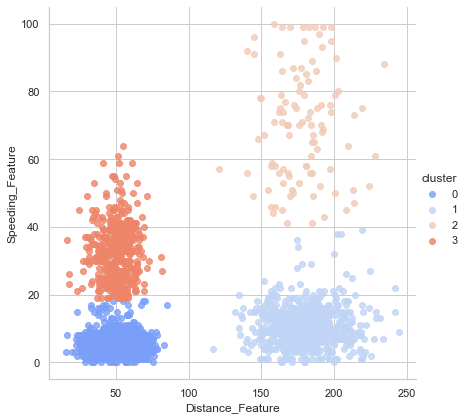

In [81]:
df_slim['cluster']=kmeans4.labels_

sns.set_style('whitegrid')

sns.lmplot('Distance_Feature', 'Speeding_Feature', 
data=df_slim, hue='cluster', palette='coolwarm',
size=6, aspect=1, fit_reg=False)